In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import integrate

# 1) Метод последовательных приближений

In [2]:
x, y, s = sp.symbols('x y s')
f = (x + y**2) / (x * y)
a = 1
b = 2
y0 = 1
N = 5
f

(x + y**2)/(x*y)

In [3]:
h = (b - a) / N
x_num = np.linspace(a, b, N + 1)
x_num, h

(array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]), 0.2)

In [4]:
def tmp(f, a, b, g):
    N = 50
    h = (b - a) / N
    x_num = np.linspace(a, b, N + 1)
    
    return h*sum([f.subs({x:a+h, y:g}) for i in range(N)])

In [5]:
sum_of_y = y0
y_new = [y0]
for i in range(N):
    sum_of_y += tmp(f, x_num[i], x_num[i+1], y_new[i])
    y_new.append(sum_of_y)

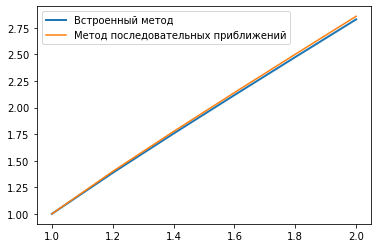

In [6]:
f_lam = sp.lambdify((x, y), f)

# solve ODE
res = odeint(f_lam, y0, x_num, tfirst=True)

# plot results
plt.plot(x_num, res, label='Встроенный метод', linewidth = 2)
plt.plot(x_num, y_new, label='Метод последовательных приближений')
plt.legend()
plt.show()

# 2) Метод Эйлера, его модификации

In [31]:
x, y = sp.symbols('x y')
f = (x + y**2) / (x * y)
a = 1
b = 2
y0 = 1
N = 10
f

(x + y**2)/(x*y)

In [32]:
h = (b - a) / N
x_num = np.linspace(a, b, N + 1)
x_num, h

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), 0.1)

Метод Эйлера

In [33]:
y_new = [y0]
for i in range(N):
    y_new.append(y_new[i] + h * f.subs({x:x_num[i], y:y_new[i]}))

Усовершенствованный Метод Эйлера

In [34]:
y_new_2 = [y0]
for i in range(N):
    y_half = y_new_2[i] + h/2 * f.subs({x:x_num[i], y:y_new_2[i]})
    y_new_2.append(y_new_2[i] + h * f.subs({x:((x_num[i] + x_num[i+1]) / 2), y:y_half}))

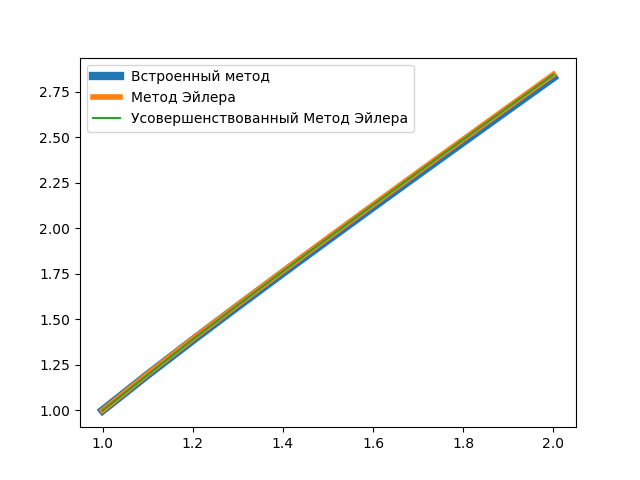

In [39]:
f_lam = sp.lambdify((x, y), f)

# solve ODE
res = odeint(f_lam, y0, x_num, tfirst=True)

# plot results
plt.plot(x_num, res, label='Встроенный метод', linewidth = 6)
plt.plot(x_num, y_new, label='Метод Эйлера', linewidth = 4)
plt.plot(x_num, y_new_2, label='Усовершенствованный Метод Эйлера')
plt.legend()
plt.show()

# 3) Метод Рунге-Кутта

In [44]:
x, y = sp.symbols('x y')
f = (x + y**2) / (x * y)
a = 1
b = 2
y0 = 1
N = 10
f

(x + y**2)/(x*y)

In [45]:
h = (b - a) / N
x_num = np.linspace(a, b, N + 1)
x_num, h

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), 0.1)

In [46]:
y_new = [y0]
for i in range(N):
    phi1 = h * f.subs({x:x_num[i], y:y_new[i]})
    phi2 = h * f.subs({x:(x_num[i] + h/2), y:(y_new[i] + phi1/2)})
    phi3 = h * f.subs({x:(x_num[i] + h/2), y:(y_new[i] + phi2/2)})
    phi4 = h * f.subs({x:(x_num[i] + h), y:(y_new[i] + phi3)})
    y_new.append(y_new[i] + 1/6*(phi1 + 2 * phi2 + 2 * phi3 + phi4))

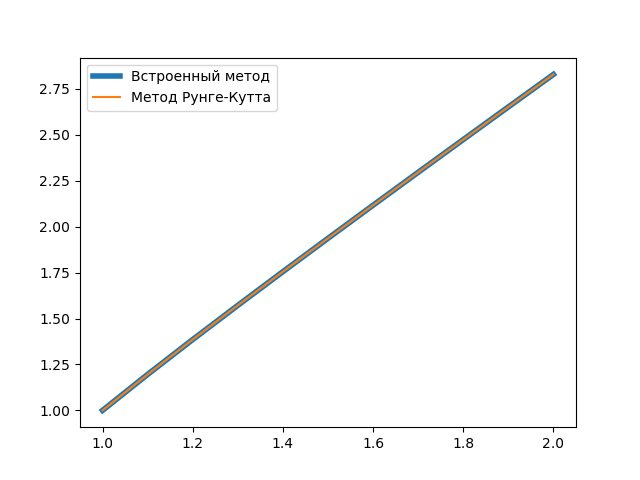

In [47]:
f_lam = sp.lambdify((x, y), f)

# solve ODE
res = odeint(f_lam, y0, x_num, tfirst=True)

# plot results
plt.plot(x_num, res, label='Встроенный метод', linewidth = 4)
plt.plot(x_num, y_new, label='Метод Рунге-Кутта')
plt.legend()
plt.show()

# 4) Метод Адамса

In [10]:
x, y = sp.symbols('x y')
f = (x + y**2) / (x * y)
a = 1
b = 2
y0 = 1
N = 10
f

(x + y**2)/(x*y)

In [11]:
h = (b - a) / N
x_num = np.linspace(a, b, N + 1)
x_num, h

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), 0.1)

In [20]:
y_new = [y0]
for i in range(3):
    phi1 = h * f.subs({x:x_num[i], y:y_new[i]})
    phi2 = h * f.subs({x:(x_num[i] + h/2), y:(y_new[i] + phi1/2)})
    phi3 = h * f.subs({x:(x_num[i] + h/2), y:(y_new[i] + phi2/2)})
    phi4 = h * f.subs({x:(x_num[i] + h), y:(y_new[i] + phi3)})
    y_new.append(y_new[i] + 1/6*(phi1 + 2 * phi2 + 2 * phi3 + phi4))
for i in range(3, N):
    y_new.append(y_new[i] + h/24*(55 * f.subs({x:x_num[i], y: y_new[i]}) - 
                                  59 * f.subs({x:x_num[i - 1], y: y_new[i - 1]}) +
                                  37 * f.subs({x:x_num[i - 2], y: y_new[i - 2]}) - 
                                  9 * f.subs({x:x_num[i - 3], y: y_new[i - 3]}))  )

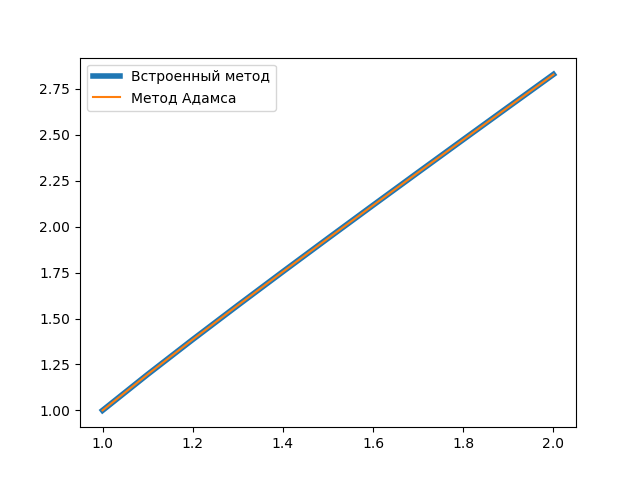

In [27]:
f_lam = sp.lambdify((x, y), f)

# solve ODE
res = odeint(f_lam, y0, x_num, tfirst=True)

# plot results
plt.plot(x_num, res, label='Встроенный метод', linewidth = 4)
plt.plot(x_num, y_new, label='Метод Адамса')
plt.legend()
plt.show()

# 5) Метод Рунге-Ромберга в правом конце отрезка

In [34]:
x, y = sp.symbols('x y')
f = (x + y**2) / (x * y)
a = 1
b = 2
y0 = 1
N = 10
m = 2
eps = 10**-5
f

(x + y**2)/(x*y)

In [36]:
def euler(f, y0, N):
    h = (b - a) / N
    x_num = np.linspace(a, b, N + 1)
    
    y_new = [y0]
    for i in range(N):
        y_half = y_new[i] + h/2 * f.subs({x:x_num[i], y:y_new[i]})
        y_new.append(y_new[i] + h * f.subs({x:((x_num[i] + x_num[i+1]) / 2), y:y_half}))
        
    return y_new

In [37]:
Y = euler(f, y0, N)[-1]
Y_new = 0
alpha = abs(Y - Y_new) / (2 ** m - 1)
while alpha > eps:
    N *= 2
    Y = Y_new
    Y_new = euler(f, y0, N)[-1]
    alpha = abs(Y - Y_new) / (2 ** m - 1)
    print(Y, Y_new, abs(Y - Y_new), N)
    
Y_new = Y_new + alpha
Y_new

0 2.82832026683225 2.82832026683225 20
2.82832026683225 2.82839999710826 7.97302760084939e-5 40
2.82839999710826 2.82842030086472 2.03037564689978e-5 80


2.82842706878355

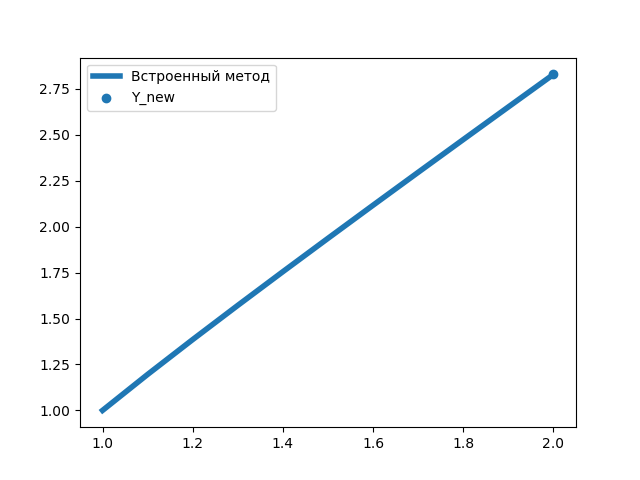

In [77]:
f_lam = sp.lambdify((x, y), f)
x_num = np.linspace(a, b, N + 1)

# solve ODE
res = odeint(f_lam, y0, x_num, tfirst=True)

# plot results
plt.plot(x_num, res, label='Встроенный метод', linewidth = 4)
plt.scatter(b, Y_new, label = 'Y_new')
plt.legend()
plt.show()

In [78]:
abs(*res[-1] - Y_new)

9.29532499860386e-8